1.- Importacion de datos y standarizacion de nombre de columnas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#housing = datasets.fetch_california_housing()
dataset = pd.read_csv("./data/ice_cream_data.csv")
dataset.head()
# Crear un DataFrame con los datos y los nombres de las características
#dataset = pd.DataFrame(data=housing.data, columns=housing.feature_names)
#dataset['MedianaPrecioVivienda'] = housing.target
# Imprimir las primeras 10 filas del DataFrame

#print(dataset.shape)
#print(housing.DESCR)
#print(dataset)




,temperature,units_ice_cream
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


Analisis de la columna Profit, con respecto a la frecuencia de datos

<Axes: >

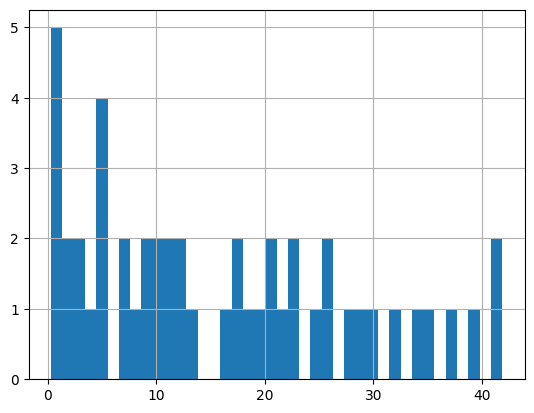

In [2]:
dataset.units_ice_cream.hist(bins=40)

Analizando las correlaciones de manera gráfica

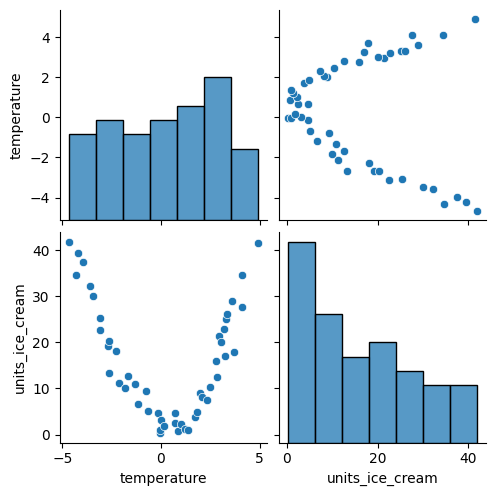

In [3]:
import matplotlib.pyplot  as plt
import seaborn as sns
sns.pairplot(dataset, height=2.5)
plt.show()

Analizando las correlaciones mediante un mapa de calor

<Axes: >

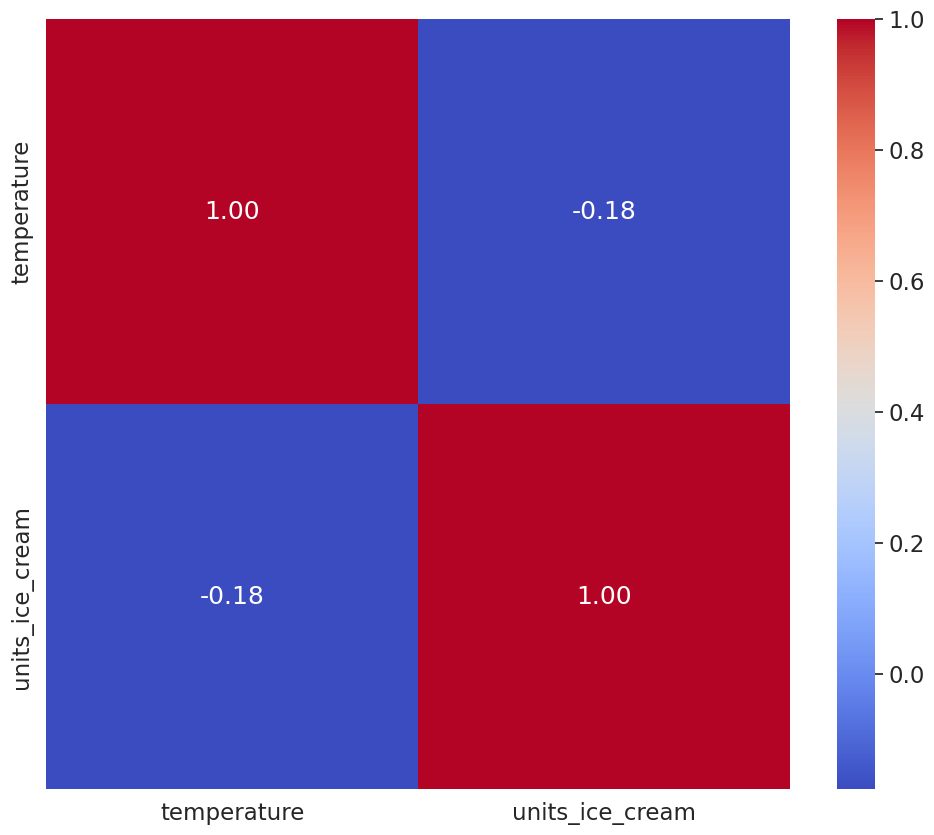

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude
numeric_cols = ['temperature', 'units_ice_cream' ]
cm = np.corrcoef(dataset[numeric_cols].values.T)
sns.set_theme(font_scale=1.5, rc={"figure.figsize": (12, 10)})
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm",yticklabels=numeric_cols, xticklabels=numeric_cols)



(49, 1)
(49, 1)


Text(0, 0.5, 'Numero de helados')

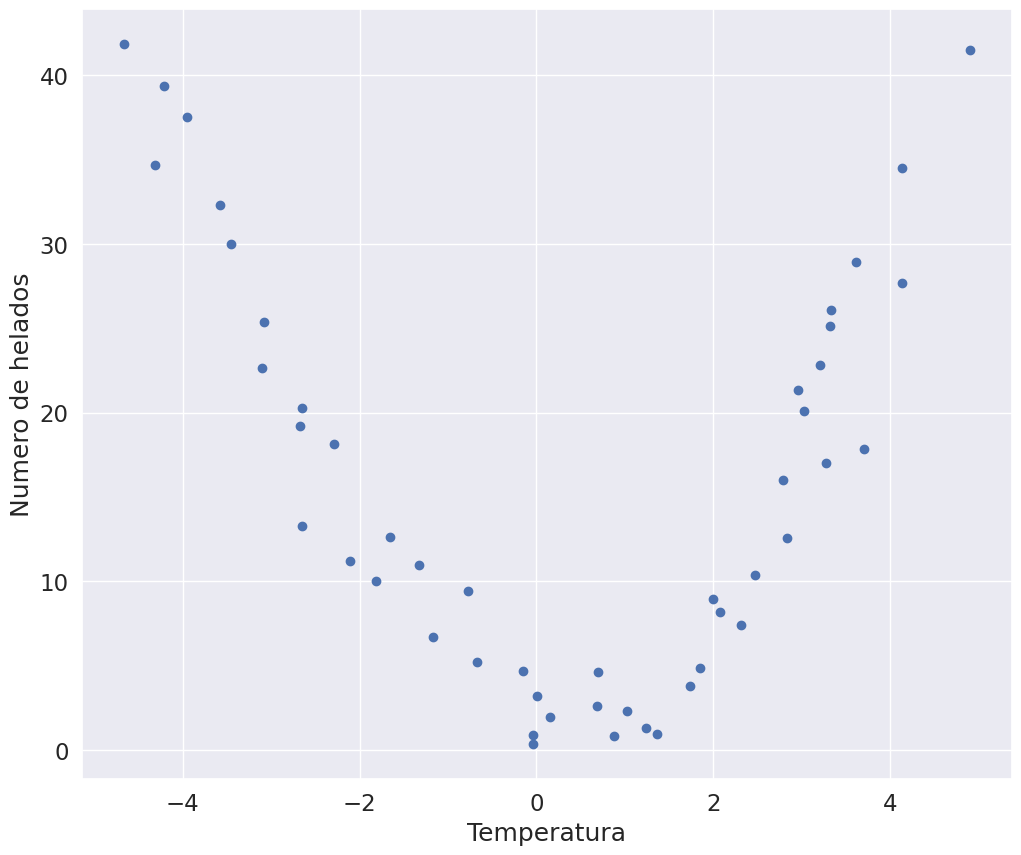

In [5]:
X_cols = list(set(dataset.columns)-set(['units_ice_cream']))
y_cols = ['units_ice_cream']

x = dataset[X_cols].values
y = dataset[y_cols].values

print(x.shape)
print(y.shape)
plt.scatter(x,y)
plt.xlabel('Temperatura')
plt.ylabel('Numero de helados')

3. Division de datos de entrenamiento y test usando standard sklearn

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_train_poly = poly_reg.fit_transform(X_train);
#X_test_poly = poly_reg.fit_transform(X_test);

regresion = LinearRegression()
regresion.fit(X_train_poly, y_train)

LinearRegression()

In [40]:
X_test_poly = poly_reg.fit_transform(X_test);
y_predict = regresion.predict(X_test_poly)    



Text(0, 0.5, 'Número de helados solicitados')

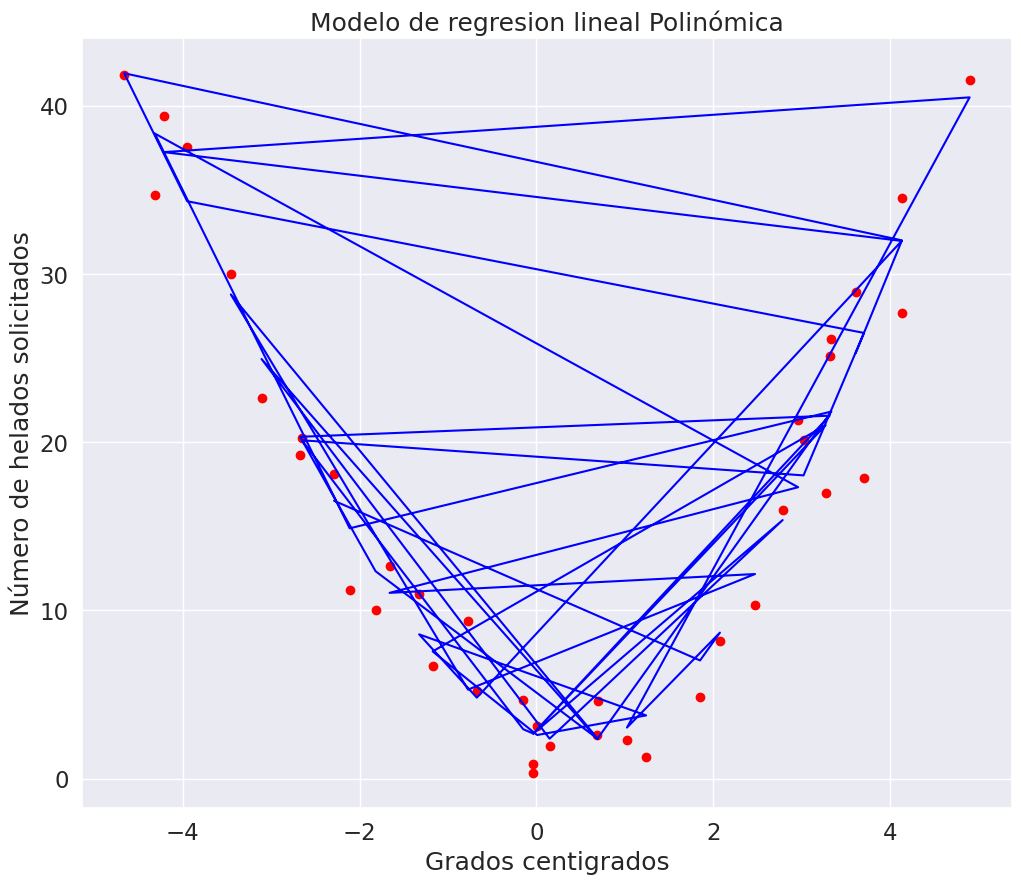

In [31]:

plt.scatter(X_train,y_train,color="red")

plt.plot(X_train, regresion.predict(X_train_poly), color="blue")
plt.title ("Modelo de regresion lineal Polinómica")
plt.xlabel("Grados centigrados")
plt.ylabel("Número de helados solicitados")

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_train_poly = poly_reg.fit_transform(x);

regresion = LinearRegression()
regresion.fit(X_train_poly, y)

LinearRegression()

Text(0, 0.5, 'Número de helados solicitados')

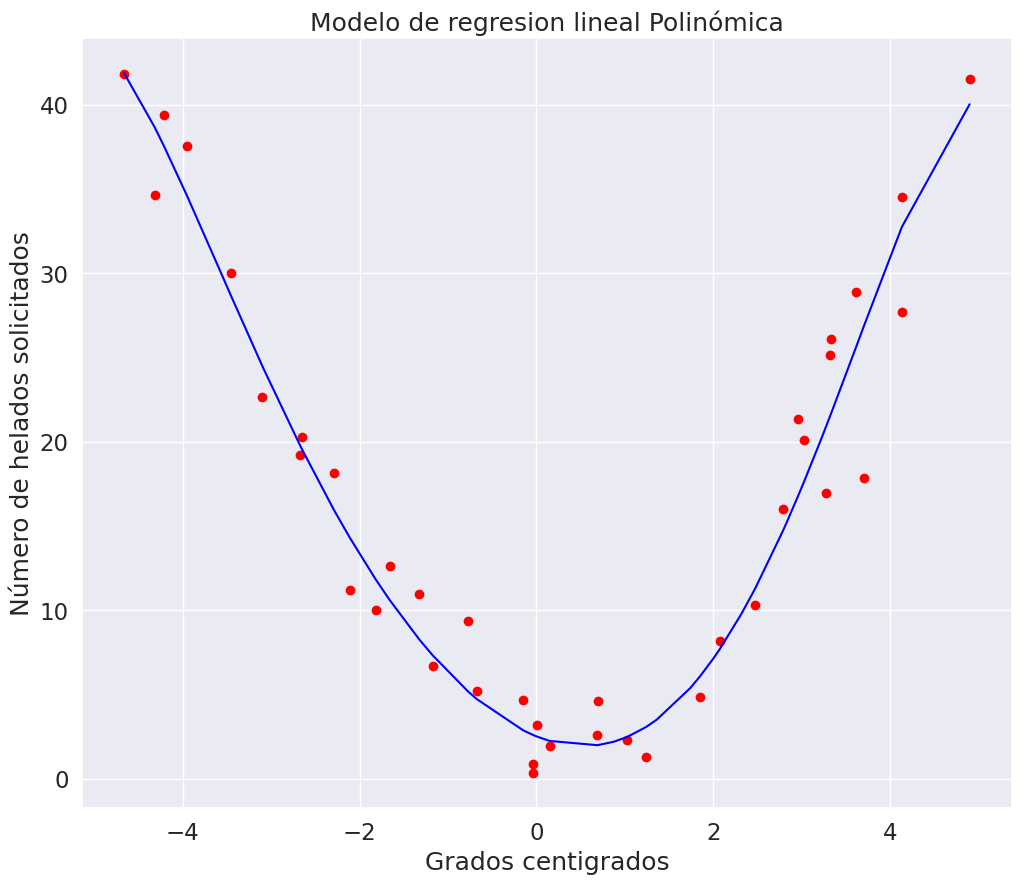

In [33]:
plt.scatter(X_train,y_train,color="red")

plt.plot(x, regresion.predict(X_train_poly), color="blue")
plt.title ("Modelo de regresion lineal Polinómica")
plt.xlabel("Grados centigrados")
plt.ylabel("Número de helados solicitados")

5. Evaluando el modelo

In [41]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
print("r2: ",r2.round(4))
print("mse: ",mse.round(4))

r2:  0.9029
mse:  10.1836


5. Creacion del modelo como PKL

In [152]:
from joblib import dump
dump(regresion, './model/model-polinomic.pkl')

['./model/model-profit.pkl']